 <a name="topo"></a>

# Sumário

1. [O Naufrágio do Titanic](#titanic)
2. [Análise Exploratória de Dados (AED)](#aed)  
3. [Visualização de Dados](#vidados)
4. [Engenharia de Recursos](#engenharia)
5. [Machine Learning](#ml)
6. [Validação Cruzada _(Cross-Validation)_](#cv)
7. [Matriz de Confusão](#matrix)
8. [Curvas ROC e AUC](#rocauc)
9. [Customização de Hyper-Parâmetros](#hyperparam)
10. [Ensembling](#ensembling)
11. [Importância de Recursos](#fimportance)
12. [Submissão](#submissao)             

 <a name="titanic"></a>

# O Naufrágio do Titanic
<img src="titanic.jpg" width=100%>

O naufrágio do Titanic é um dos mais infames naufrágios da história.

Em 15 de abril de 1912, durante sua viagem inaugural, o amplamente considerado "inafundável" RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia barcos salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

Embora houvesse algum elemento de sorte envolvido na sobrevivência, parece que alguns grupos de pessoas eram mais propensos a sobreviver do que outros.

Nesse desafio, pedimos que você construa um modelo preditivo que responda à pergunta: “que tipo de pessoas têm maior probabilidade de sobreviver?” Usando dados de passageiros (por exemplo, nome, idade, sexo, classe socioeconômica etc.).

Página da Competição: https://www.kaggle.com/c/titanic

Fontes de Consulta: 
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://www.kaggle.com/ash316/eda-to-prediction-dietanic
* https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
* https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy
* https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818
* https://www.kaggle.com/cdeotte/titantic-mega-model-0-84210
* https://www.kaggle.com/cdeotte/titanic-wcg-xgboost-0-84688
* https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c
* https://www.kaggle.com/reisel/save-the-families
* https://www.kaggle.com/gunesevitan/advanced-feature-engineering-tutorial-with-titanic
<br>

[início](#topo)

 <a name="aed"></a>

## Análise Exploratória de Dados (AED)
Esse passo é essencial, pois é através dele que iremos construir um entendimento intuitivo dos dados, entender como os parâmetros estão relacionados, procurar e encontrar tendências e relações entre diferentes parâmetros.

<br>

[início](#topo)

### Importar bibliotecas

In [290]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Ler train e test

In [293]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [296]:
train.set_index('PassengerId', inplace=True)

In [298]:
test.set_index('PassengerId', inplace=True)

### Verificar shape dos dois

In [301]:
train.shape, test.shape

((891, 11), (418, 10))

In [303]:
data = pd.concat([train,test], sort=False)

### Traduzir Colunas

In [306]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [308]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 'IrmaosConjuge', 'PaisFilhos', 'Bilhete',
       'Tarifa', 'Cabine', 'Embarque']

In [310]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 <a name="mapsex"></a>

### Mapear Sexo para "homem" e "mulher"

In [315]:
sexo = {'male':'homem','female':'mulher'}

In [317]:
data.Sexo = data.Sexo.map(sexo)
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


 <a name="portembarque"></a>

 <a name="paracat"></a>

### Parâmetros Categóricos  <a name="nom"></a>
* ### Nominais

In [322]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sobreviveu     891 non-null    float64
 1   Classe         1309 non-null   int64  
 2   Nome           1309 non-null   object 
 3   Sexo           1309 non-null   object 
 4   Idade          1046 non-null   float64
 5   IrmaosConjuge  1309 non-null   int64  
 6   PaisFilhos     1309 non-null   int64  
 7   Bilhete        1309 non-null   object 
 8   Tarifa         1308 non-null   float64
 9   Cabine         295 non-null    object 
 10  Embarque       1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [324]:
#Sexo
#Embarque
#Sobreviveu

 <a name="ord"></a>

* ### Ordinais

In [328]:
#Classe

 <a name="paranum"></a>

### Parâmetros Numéricos  <a name="cont"></a>
* ### Contínuos

In [188]:
#Idade
#Tarifa

 <a name="disc"></a>

* ### Discretos

In [192]:
#IrmaoEsposo
#PaisFilhos

 <a name="paraalfa"></a>

### Parâmetros Alfanuméricos

In [37]:
#Bilhete

 <a name="missing"></a>

### Dados incompletos (faltando dados)

In [330]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

<a name="numinfo"></a>

### Preencher Embarque com Moda

In [334]:
moda_embarque = data.Embarque.mode()[0]
moda_embarque

'S'

In [336]:
data.Embarque.fillna(moda_embarque, inplace=True)

### Informações Gerais (Parâmetros Numéricos)

In [339]:
data.describe()

,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


 <a name="catinfo"></a>

### Informações Gerais de Parâmetros Categóricos

In [343]:
data.describe(include=['O'])

,Nome,Sexo,Bilhete,Cabine,Embarque
count,1309,1309,1309,295,1309
unique,1307,2,929,186,3
top,"Connolly, Miss. Kate",homem,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,916


 <a name="infoamostra"></a>

## Informações da Amostra

<br>

[início](#topo)

### Tamanho da Amostra

In [348]:
len(data)

1309

### Proporção Total da Amostra em relação à População

In [351]:
len(train)/2224

0.4006294964028777

### Proporção de Sobreviventes (População)

In [354]:
1-1502/2224

0.32464028776978415

### Proporção de Sobreviventes (Amostra)

In [357]:
train.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [359]:
342/len(train)

0.3838383838383838

 <a name="agrupamentos"></a>

# Agrupamentos

<br>

[início](#topo)

### Agrupar Classe x Sobrevivência

In [364]:
data[['Classe','Sobreviveu']].groupby(['Classe'])\
.mean().sort_values(by='Sobreviveu', ascending=False)

,Sobreviveu
Classe,
1,0.629630
2,0.472826
3,0.242363


* Passageiros de Primeira Classe são muito mais propensos a sobreviver do que de Segunda e Terceira Classe
* Passageiros de Segunda Classe são menos propensos a sobreviver do que de Primeira Classe, mas são mais propensos a sobreviver do que de Terceira Classe

### Agrupar Sexo x Sobrevivência

In [368]:
data[['Sexo','Sobreviveu']].groupby('Sexo')\
.mean().sort_values(by='Sobreviveu',ascending=False)

,Sobreviveu
Sexo,
mulher,0.742038
homem,0.188908


* 74% das mulheres sobreviveram em contraste com 18,89% dos homens da nossa amostra

### Agrupar IrmaosConjuge x Sobrevivência

In [372]:
data[['IrmaosConjuge','Sobreviveu']].groupby('IrmaosConjuge')\
.mean().sort_values(by='Sobreviveu',ascending=False)

,Sobreviveu
IrmaosConjuge,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


### Agrupar PaisFilhos x Sobrevivência

In [375]:
data[['PaisFilhos','Sobreviveu']].groupby('PaisFilhos')\
.mean().sort_values(by='Sobreviveu',ascending=False)

,Sobreviveu
PaisFilhos,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000
9,NaN


### Correlação de IrmaosConjuge e PaisFilhos

In [378]:
data[['IrmaosConjuge','PaisFilhos']].corr()

,IrmaosConjuge,PaisFilhos
IrmaosConjuge,1.000000,0.373587
PaisFilhos,0.373587,1.000000


* IrmaosConjuge e PaisFilhos não possuem uma correlação muito forte. Talvez seja o caso juntá-los como um único recurso depois

 <a name="vidados"></a>

# Visualização de Dados
Observar os dados de forma visual para averiguar as suposições feitas até agora

<br>

[início](#topo)

### Gráfico de Barras e Pizza de Sobreviventes

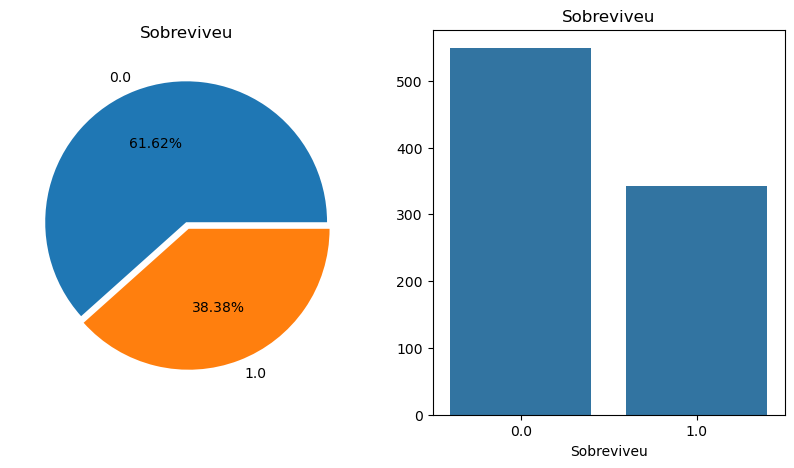

In [384]:
f,ax=plt.subplots(1,2,figsize=(10,5))
data.Sobreviveu.value_counts().plot.pie(explode=[0,0.05],autopct='%0.2f%%',ax=ax[0])
ax[0].set_title('Sobreviveu')
ax[0].set_ylabel('')
sns.countplot(x='Sobreviveu',data=data,ax=ax[1])
ax[1].set_title('Sobreviveu')
ax[1].set_ylabel('')
plt.show()

## Sobrevivência Por Sexo

In [387]:
data.groupby(['Sexo','Sobreviveu'])['Sobreviveu'].count()

Sexo    Sobreviveu
homem   0.0           468
        1.0           109
mulher  0.0            81
        1.0           233
Name: Sobreviveu, dtype: int64

In [389]:
data.loc[data.Sexo=='mulher']['Sobreviveu'].value_counts()

Sobreviveu
1.0    233
0.0     81
Name: count, dtype: int64

<a name="barrassob"></a>

### Gráfico de Barras de Sobreviventes por Sexo

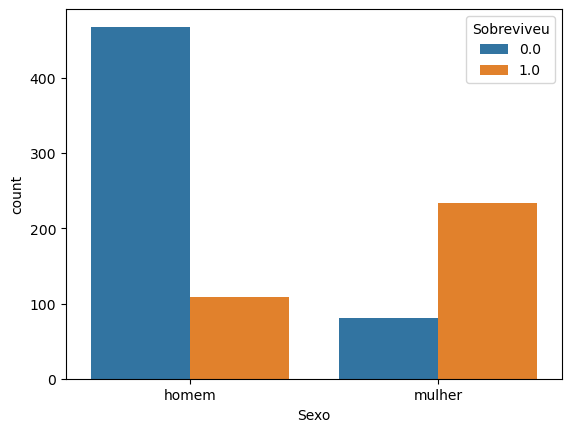

In [393]:
sns.countplot(x='Sexo',hue='Sobreviveu',data=data)
plt.show()

<a name="histidsob"></a>

### Histograma de Idade x Sobreviveu

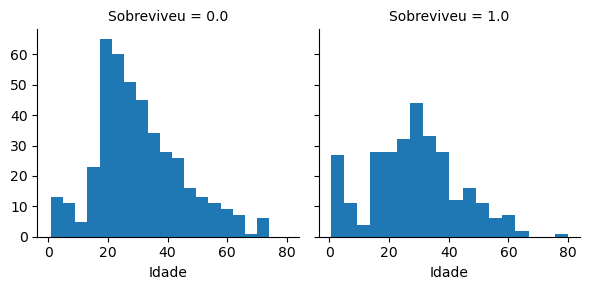

In [397]:
g = sns.FacetGrid(data,col='Sobreviveu')
g.map(plt.hist,'Idade',bins=18)
plt.show()

* Crianças sobreviveram mais
* Passageiro mais idoso sobreviveu
* A maioria dos passageiros estão na faixa de 18-35 anos (E a maioria não sobreviveu)

<a name="histclassidsob"></a>

### Histograma de Idade x Classe x Sobreviveu com FacetGrid

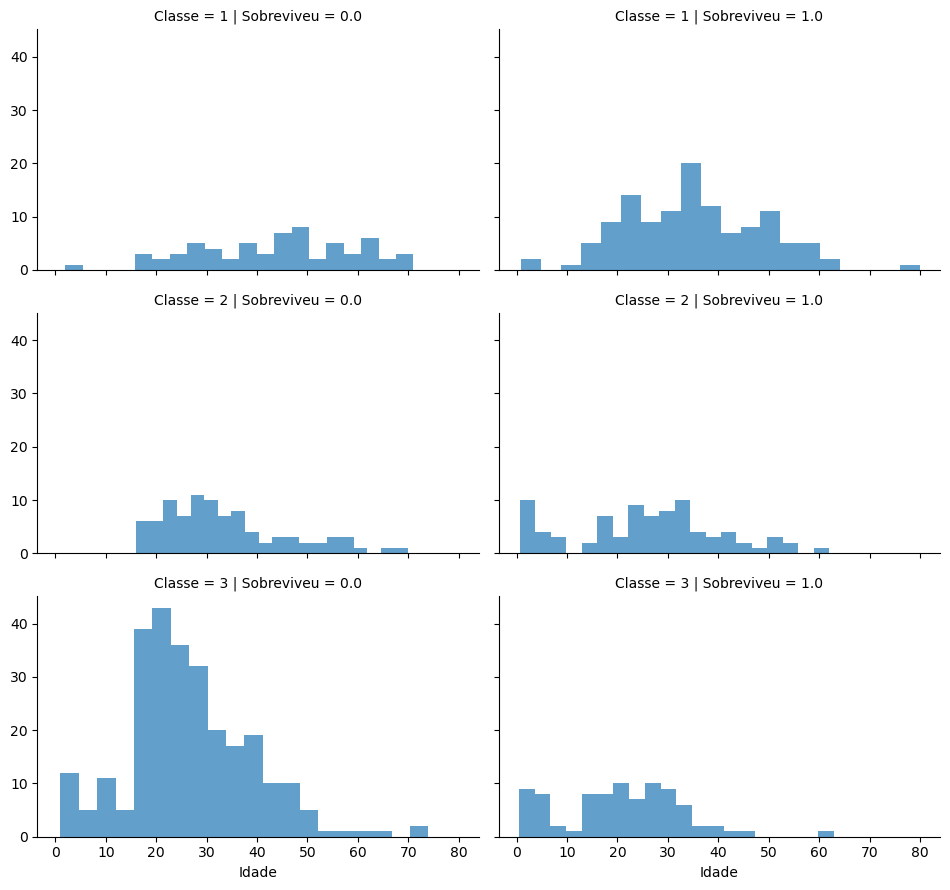

In [402]:
grid = sns.FacetGrid(data,col='Sobreviveu',row='Classe',aspect=1.6)
grid.map(plt.hist,'Idade',alpha=0.7,bins=20)
plt.show()

<a name="chancesporto"></a>

### Chances de Sobrevivência por Porto de Embarque

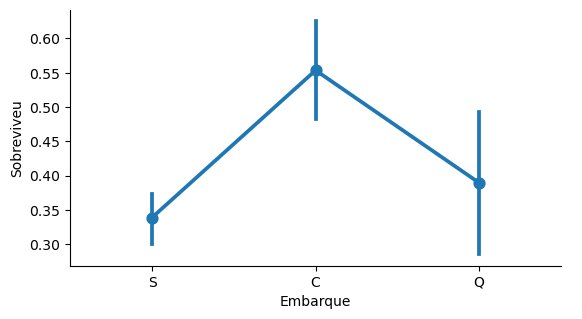

In [405]:
sns.catplot(x='Embarque',y='Sobreviveu',data=data,kind='point')
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.show()

<a name="pointplotembarque"></a>

### Embarque x Classe x Sobreviveu

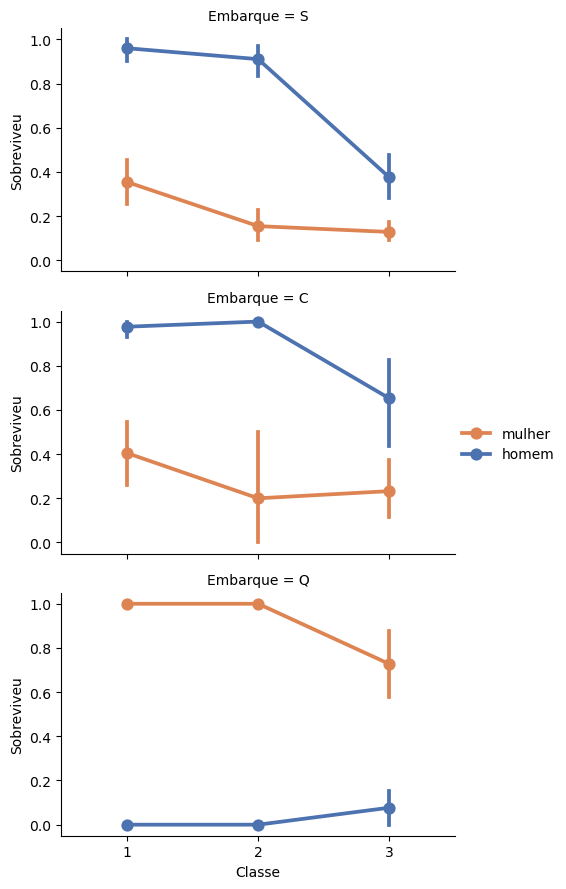

In [410]:
grid = sns.FacetGrid(data,row='Embarque',aspect=1.6)
grid.map(sns.pointplot,'Classe','Sobreviveu','Sexo',palette='deep')
grid.add_legend()
plt.show()

### Agrupar mulheres por sobrevivência

In [413]:
data.loc[data['Sexo']=='mulher'].groupby('Sobreviveu').mean()

TypeError: agg function failed [how->mean,dtype->object]

### Agrupar homens por sobrevivência

In [416]:
data.loc[data.Sexo=='homem'].groupby('Sobreviveu').mean()

TypeError: agg function failed [how->mean,dtype->object]

<a name="graficobarras"></a>

### Gráfico de Barras Sexo x Tarifa por Sexo

<br>

[início](#topo)

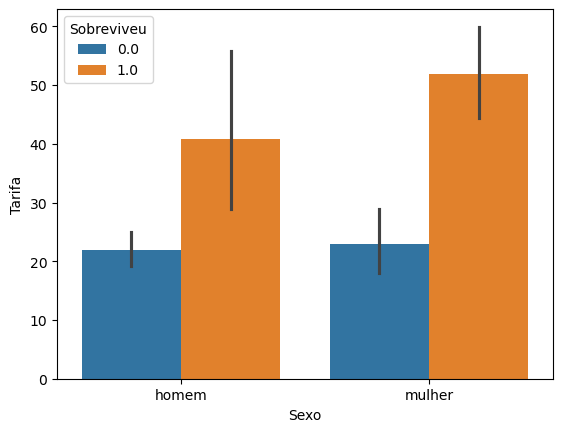

In [420]:
sns.barplot(x='Sexo',y='Tarifa',hue='Sobreviveu',data=data)
plt.show()

<a name="graficobarrassex"></a>

### Gráfico de Barras Sexo x Tarifa x Embarque x Sobreviveu

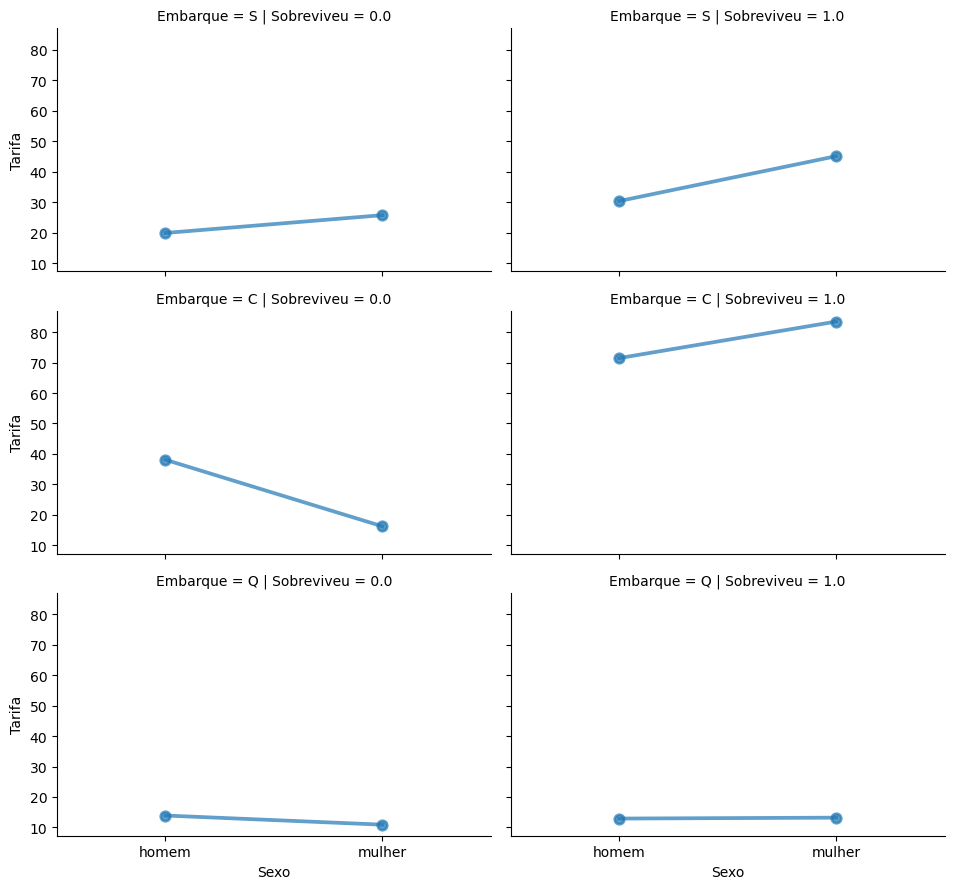

In [424]:
grid = sns.FacetGrid(data,row='Embarque',col='Sobreviveu',aspect=1.6)
grid.map(sns.pointplot,'Sexo','Tarifa',alpha=0.7,ci=None)
grid.add_legend()
plt.show()

<a name="pizza"></a>

### Crosstab de Sobrevivência por Classe

In [427]:
pd.crosstab(data.Sobreviveu,data.Classe,margins=True)\
.style.background_gradient(cmap='OrRd')

Classe,1,2,3,All
Sobreviveu,,,,
0.000000,80,97,372,549
1.000000,136,87,119,342
All,216,184,491,891


<a name="vimissing"></a>

## Visualizando Dados Faltando

<br>

[início](#topo)

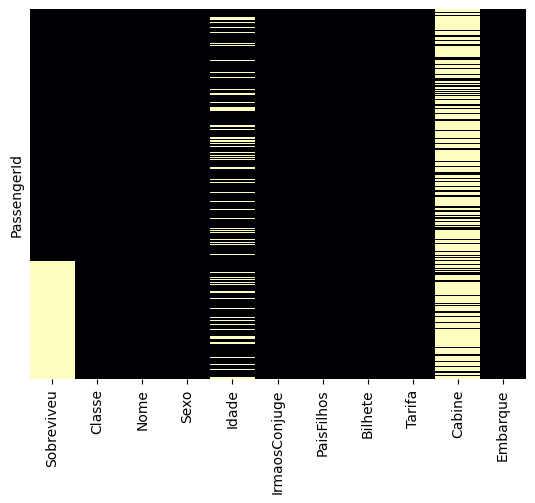

In [430]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='magma')
plt.show()

### Remover Cabine

In [ ]:
data.drop(['Cabine'],axis=1,inplace=True)

<a name="boxplot"></a>

### Boxplot de Classe por Sexo

In [ ]:
plt.figure(figsize=(5,3),dpi=100)
sns.boxplot(x='Classe',y='Idade',hue='Sexo',data=data)
plt.show()

<a name="engenharia"></a>

# Engenharia de Recursos

<br>

[início](#topo)

### Extrair Titulo do Nome

In [432]:
data['Titulo'] = data.Nome.str.extract('([a-zA-Z]+)\.')

In [434]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [436]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [438]:
data['Titulo'] = data['Titulo'].apply(lambda x:'Outros' if x not in ['Miss','Master','Mr','Mrs'] else x)

In [440]:
pd.crosstab(data['Titulo'],data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [443]:
titulos_traduzidos = {'Miss':'Solteira','Master':'Menino','Mr':'HomemAdulto','Mrs':'Casada','Outros':'Outros'}

In [445]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

In [447]:
pd.crosstab(data['Titulo'],data['Sexo'])

Sexo,homem,mulher
Titulo,,
Casada,0,197
HomemAdulto,757,0
Menino,61,0
Outros,25,9
Solteira,0,260


# Mulheres e Crianças sobreviveram ou morreram juntos?

## Extrair sobrenome para identificar possíveis famílias

In [449]:
data['Nome'].str.split(',').str[0]

PassengerId
1              Braund
2             Cumings
3           Heikkinen
4            Futrelle
5               Allen
            ...      
1305          Spector
1306    Oliva y Ocana
1307          Saether
1308             Ware
1309            Peter
Name: Nome, Length: 1309, dtype: object

### Criar Feature Sobrenome da Família

In [452]:
data['Sobrenome']=data['Nome'].str.split(',').str[0]

### Verificar as maiores famílias

In [455]:
data.groupby(['Sobrenome'])['Nome'].count().sort_values(ascending=False)

Sobrenome
Andersson         11
Sage              11
Goodwin            8
Asplund            8
Davies             7
                  ..
Humblen            1
Hunt               1
Hyman              1
Ibrahim Shawah     1
van Melkebeke      1
Name: Nome, Length: 875, dtype: int64

### Analisar Sobrevivência de Mulheres e Crianças da Família "Andersson"

In [458]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete']].loc[data.Sobrenome=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
69,1.0,Solteira,Andersson,3101281
120,0.0,Solteira,Andersson,347082
542,0.0,Solteira,Andersson,347082
543,0.0,Solteira,Andersson,347082
611,0.0,Casada,Andersson,347082
814,0.0,Solteira,Andersson,347082
851,0.0,Menino,Andersson,347082
1106,NaN,Solteira,Andersson,347091


### Mulheres e Crianças da Família "Sage"

In [461]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete']].loc[data.Sobrenome=='Sage']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
160,0.0,Menino,Sage,CA. 2343
181,0.0,Solteira,Sage,CA. 2343
793,0.0,Solteira,Sage,CA. 2343
864,0.0,Solteira,Sage,CA. 2343
1080,NaN,Solteira,Sage,CA. 2343
1252,NaN,Menino,Sage,CA. 2343
1257,NaN,Casada,Sage,CA. 2343


### Mulheres e Crianças da Família "Brown"

In [464]:
data[['Sobreviveu','Titulo','Sobrenome','Bilhete']].loc[data.Sobrenome=='Brown']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

,Sobreviveu,Titulo,Sobrenome,Bilhete
PassengerId,,,,
195,1.0,Casada,Brown,PC 17610
346,1.0,Solteira,Brown,248733
671,1.0,Casada,Brown,29750
1067,NaN,Solteira,Brown,29750
1248,NaN,Casada,Brown,11769


### Criar DataFrame "MulherOuCrianca"

In [467]:
MulherOuCrianca = data.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]

In [469]:
MulherOuCrianca

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque,Titulo,Sobrenome
PassengerId,,,,,,,,,,,,,
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C,Casada,Cumings
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Solteira,Heikkinen
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S,Casada,Futrelle
8,0.0,3,"Palsson, Master. Gosta Leonard",homem,2.0,3,1,349909,21.0750,NaN,S,Menino,Palsson
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",mulher,27.0,0,2,347742,11.1333,NaN,S,Casada,Johnson
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1302,NaN,3,"Naughton, Miss. Hannah",mulher,NaN,0,0,365237,7.7500,NaN,Q,Solteira,Naughton
1303,NaN,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",mulher,37.0,1,0,19928,90.0000,C78,Q,Casada,Minahan
1304,NaN,3,"Henriksson, Miss. Jenny Lovisa",mulher,28.0,0,0,347086,7.7750,NaN,S,Solteira,Henriksson


### Criar Feature "TamanhoGrupo"
Referente a quantidade de Pessoas que possuem o mesmo sobrenome

In [472]:
MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']=='Brown']['Sobreviveu'].count()

3

In [474]:
data['TamanhoGrupo'] = data['Sobrenome'].apply(lambda x: MulherOuCrianca.loc[MulherOuCrianca['Sobrenome']==x]['Sobreviveu'].count() )

### Sobrevivência Família "Andersson"

In [478]:
data[['TamanhoGrupo','Sobrenome','Titulo','Sobreviveu']].sort_values(by='TamanhoGrupo',ascending=False).head(10)

,TamanhoGrupo,Sobrenome,Titulo,Sobreviveu
PassengerId,,,,
1212,7,Andersson,HomemAdulto,NaN
69,7,Andersson,Solteira,1.0
611,7,Andersson,Casada,0.0
120,7,Andersson,Solteira,0.0
147,7,Andersson,HomemAdulto,1.0
1106,7,Andersson,Solteira,NaN
814,7,Andersson,Solteira,0.0
543,7,Andersson,Solteira,0.0
851,7,Andersson,Menino,0.0


In [480]:
for i, _ in data.iterrows():
    if data['Titulo'].at[i] == 'HomemAdulto':
        data['TamanhoGrupo'].at[i] = 0

### Criar Recurso "SobrevivenciaGrupo"

In [483]:
data[['Titulo','Sobreviveu']].loc[data['Sobrenome']=='Andersson']\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].mean()

0.14285714285714285

In [485]:
data['SobrevivenciaGrupo'] = data['Sobrenome'].apply(lambda x: data[['Titulo','Sobreviveu']].loc[data['Sobrenome']==x]\
.loc[(data['Sexo']=='mulher') | (data['Titulo']=='Menino')]['Sobreviveu'].mean() )

In [486]:
data[['SobrevivenciaGrupo','Titulo']]

,SobrevivenciaGrupo,Titulo
PassengerId,,
1,NaN,HomemAdulto
2,1.0,Casada
3,1.0,Solteira
4,1.0,Casada
5,1.0,HomemAdulto
...,...,...
1305,NaN,HomemAdulto
1306,NaN,Outros
1307,NaN,HomemAdulto


In [487]:
for i, _ in data.iterrows():
    if data['Titulo'].at[i] == 'HomemAdulto':
        data['SobrevivenciaGrupo'].at[i] = 0

In [488]:
data['SobrevivenciaGrupo'].isnull().sum()

119

In [489]:
data['SobrevivenciaGrupo'].fillna(0, inplace=True)

In [490]:
data['SobrevivenciaGrupo'].isnull().sum()

0

###  Grupos de Mulheres e Criancas onde todos morreram juntos

In [498]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Palsson', 'Rice', 'Vander Planke', 'Panula', 'Goodwin', 'Skoog',
       'Zabour', 'Jussila', 'Boulos', 'Ford', 'Sage', 'Lefebre', 'Strom',
       'Barbara', 'Van Impe', 'Bourke'], dtype=object)

### Quantidade de Pessoas (morreram)

In [501]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==0) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobreviveu'].count()

50

###  Grupos de Mulheres e Criancas onde todos sobreviveram juntos

In [504]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Johnson', 'Sandstrom', 'Nicola-Yarred', 'Laroche', 'Harper',
       'West', 'Moubarek', 'Caldwell', 'Fortune', 'Doling', 'Peter',
       'Goldsmith', 'Becker', 'Navratil', 'Brown', 'Newell', 'Collyer',
       'Murphy', 'Hamalainen', 'Graham', 'Mellinger', 'Kelly', 'Hays',
       'Ryerson', 'Wick', 'Hippach', 'Coutts', 'Richards', 'Hart',
       'Baclini', 'Quick', 'Taussig', 'Herman', 'Moor'], dtype=object)

### Quantidade de Pessoas (sobreviveram)

In [507]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']==1) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobreviveu'].count()

74

###  Grupos de Mulheres e Criancas com sobrevivência mista

In [510]:
data[['Sobrenome','Titulo']].loc[(data['SobrevivenciaGrupo']>0)\
& (data['SobrevivenciaGrupo']<1) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobrenome'].unique()

array(['Asplund', 'Andersson', 'Allison', 'Carter'], dtype=object)

### Quantidade de Pessoas (sobrevivência mista)

In [513]:
data[['Sobrenome','Titulo','Sobreviveu']].loc[(data['SobrevivenciaGrupo']>0)\
& (data['SobrevivenciaGrupo']<1) & (data['TamanhoGrupo']>1)]\
.loc[(data['Sexo']=='mulher')|(data['Titulo']=='Menino')]['Sobreviveu'].count()

18

### Criar Recurso ExpecativaDeVida

In [516]:
data['ExpectativaDeVida'] = ''
#viver, morrer ou desconhecida
for i,_ in data.iterrows():
    if (data['SobrevivenciaGrupo'].at[i]==0)&(data['TamanhoGrupo'].at[i]>1):
        data['ExpectativaDeVida'].at[i] = 'morrer'
    elif (data['SobrevivenciaGrupo'].at[i]==1)&(data['TamanhoGrupo'].at[i]>1):
        data['ExpectativaDeVida'].at[i] = 'viver'
    else:
        data['ExpectativaDeVida'].at[i] = 'desconhecida'


In [518]:
data['ExpectativaDeVida']

PassengerId
1       desconhecida
2       desconhecida
3       desconhecida
4       desconhecida
5       desconhecida
            ...     
1305    desconhecida
1306    desconhecida
1307    desconhecida
1308    desconhecida
1309           viver
Name: ExpectativaDeVida, Length: 1309, dtype: object

In [520]:
pd.crosstab(data['ExpectativaDeVida'],data['Sobreviveu'])

Sobreviveu,0.0,1.0
ExpectativaDeVida,,
desconhecida,498,268
morrer,50,0
viver,1,74


### Poderíamos linkar com o Bilhete
Uma vez que não necessariamente esses grupos são da mesma família, e nem todos que possuem o mesmo sobrenome são da mesma família. Porém, existem divergências ao análisar apenas os bilhetes. O ideal seria combiná-los para gerar ainda mais insights.

<a name="dummy"></a>

### Remover Colunas que não serão mais utilizadas

In [525]:
data.isnull().sum()

Sobreviveu             418
Classe                   0
Nome                     0
Sexo                     0
Idade                  263
IrmaosConjuge            0
PaisFilhos               0
Bilhete                  0
Tarifa                   1
Cabine                1014
Embarque                 0
Titulo                   0
Sobrenome                0
TamanhoGrupo             0
SobrevivenciaGrupo       0
ExpectativaDeVida        0
dtype: int64

In [527]:
data.drop(['Nome','Bilhete','Sobrenome'],axis=1,inplace=True)

# Variáveis Dummy

<br>

[início](#topo)

In [530]:
data.describe(include='O')

,Sexo,Cabine,Embarque,Titulo,ExpectativaDeVida
count,1309,295,1309,1309,1309
unique,2,186,3,5,3
top,homem,C23 C25 C27,S,HomemAdulto,desconhecida
freq,843,6,916,757,1159


In [532]:
data = pd.get_dummies(data,columns=['Classe','Embarque','Titulo','ExpectativaDeVida','Sexo'], drop_first=True)

In [534]:
data.shape

(1309, 19)

# Usar Predição da Idade

<br>

[início](#topo)

In [538]:
idade = pd.read_csv('idade_completa.csv')

In [540]:
idade.set_index('IdPassageiro',inplace=True)

In [542]:
idade

,Idade
IdPassageiro,
1,22.000000
2,38.000000
3,26.000000
4,35.000000
5,35.000000
...,...
1300,25.163780
1302,25.163531
1305,29.088798


In [545]:
data.drop('Idade',axis=1,inplace=True)

In [547]:
data.shape

(1309, 18)

In [549]:
data = pd.concat([data,idade],axis=1)

## Preencher Tarifa Faltando Com a Média

<br>

[início](#topo)

In [552]:
data.isnull().sum()

Sobreviveu                   418
IrmaosConjuge                  0
PaisFilhos                     0
Tarifa                         1
Cabine                      1014
TamanhoGrupo                   0
SobrevivenciaGrupo             0
Classe_2                       0
Classe_3                       0
Embarque_Q                     0
Embarque_S                     0
Titulo_HomemAdulto             0
Titulo_Menino                  0
Titulo_Outros                  0
Titulo_Solteira                0
ExpectativaDeVida_morrer       0
ExpectativaDeVida_viver        0
Sexo_mulher                    0
Idade                          0
dtype: int64

In [554]:
tarifa_media = data.Tarifa.mean()

In [556]:
tarifa_media

33.29547928134557

In [558]:
data['Tarifa'].fillna(tarifa_media,inplace=True)

<a name="faixaetaria"></a>

In [561]:
data.isnull().sum()

Sobreviveu                   418
IrmaosConjuge                  0
PaisFilhos                     0
Tarifa                         0
Cabine                      1014
TamanhoGrupo                   0
SobrevivenciaGrupo             0
Classe_2                       0
Classe_3                       0
Embarque_Q                     0
Embarque_S                     0
Titulo_HomemAdulto             0
Titulo_Menino                  0
Titulo_Outros                  0
Titulo_Solteira                0
ExpectativaDeVida_morrer       0
ExpectativaDeVida_viver        0
Sexo_mulher                    0
Idade                          0
dtype: int64

# Criar Faixa Etária

<br>

[início](#topo)

In [564]:
data['FaixaEtaria'] = pd.cut(data.Idade.astype('int'),bins=5)

 <a name="dummyfe"></a>

In [567]:
pd.crosstab(data.FaixaEtaria,data.Sobreviveu)

Sobreviveu,0.0,1.0
FaixaEtaria,,
"(-0.08, 16.0]",55,58
"(16.0, 32.0]",318,165
"(32.0, 48.0]",127,88
"(48.0, 64.0]",39,30
"(64.0, 80.0]",10,1


### Dummy Faixa Etaria

In [570]:
data = pd.get_dummies(data,columns=['FaixaEtaria'],drop_first=True)

In [572]:
data.shape

(1309, 23)

 <a name="familiares"></a>

### Criar Recurso "Familiares" _(Feature Engeneering)_ 
Baseados em IrmaosConjuge e PaisFilhos

<br>

[início](#topo)

In [576]:
data['Familiares'] = data['IrmaosConjuge'] + data['PaisFilhos']

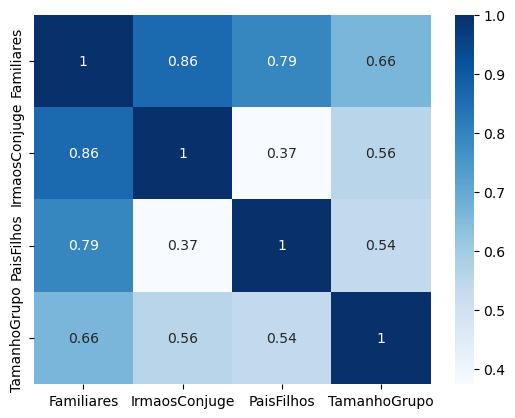

In [578]:
sns.heatmap(data[['Familiares','IrmaosConjuge','PaisFilhos','TamanhoGrupo']].corr(), annot=True, cmap='Blues')
plt.show()

 <a name="sozinho"></a>

### Criar Parâmetro "Sozinho"_(Feature Engeneering)_
Pessoa que não está com nenhum familiar

<br>

[início](#topo)

In [582]:
sozinho = data['Familiares'] == 0

In [584]:
data['Sozinho'] = sozinho.map({True:1,False:0})

In [586]:
data.shape

(1309, 25)

## Atualizar train e test 

In [589]:
train = data.loc[train.index]

In [591]:
train.shape

(891, 25)

In [593]:
test= data.loc[test.index]

In [595]:
test.shape

(418, 25)

In [597]:
test.drop('Sobreviveu',axis=1,inplace=True)

In [599]:
test.shape

(418, 24)

In [601]:
test.isnull().sum()

IrmaosConjuge                 0
PaisFilhos                    0
Tarifa                        0
Cabine                      327
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
FaixaEtaria_(16.0, 32.0]      0
FaixaEtaria_(32.0, 48.0]      0
FaixaEtaria_(48.0, 64.0]      0
FaixaEtaria_(64.0, 80.0]      0
Familiares                    0
Sozinho                       0
dtype: int64

In [603]:
train.isnull().sum()

Sobreviveu                    0
IrmaosConjuge                 0
PaisFilhos                    0
Tarifa                        0
Cabine                      687
TamanhoGrupo                  0
SobrevivenciaGrupo            0
Classe_2                      0
Classe_3                      0
Embarque_Q                    0
Embarque_S                    0
Titulo_HomemAdulto            0
Titulo_Menino                 0
Titulo_Outros                 0
Titulo_Solteira               0
ExpectativaDeVida_morrer      0
ExpectativaDeVida_viver       0
Sexo_mulher                   0
Idade                         0
FaixaEtaria_(16.0, 32.0]      0
FaixaEtaria_(32.0, 48.0]      0
FaixaEtaria_(48.0, 64.0]      0
FaixaEtaria_(64.0, 80.0]      0
Familiares                    0
Sozinho                       0
dtype: int64

## Utilizar train para treinar o modelo

In [606]:
X = train.drop('Sobreviveu',axis=1)

In [608]:
y = train['Sobreviveu']

In [610]:
X.shape, y.shape

((891, 24), (891,))

### Escolher colunas

In [613]:
X.columns

Index(['IrmaosConjuge', 'PaisFilhos', 'Tarifa', 'Cabine', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'FaixaEtaria_(16.0, 32.0]', 'FaixaEtaria_(32.0, 48.0]',
       'FaixaEtaria_(48.0, 64.0]', 'FaixaEtaria_(64.0, 80.0]', 'Familiares',
       'Sozinho'],
      dtype='object')

In [941]:
recursos = ['IrmaosConjuge', 'PaisFilhos', 'Tarifa', 'TamanhoGrupo',
       'SobrevivenciaGrupo', 'Classe_2', 'Classe_3', 'Embarque_Q',
       'Embarque_S', 'Titulo_HomemAdulto', 'Titulo_Menino', 'Titulo_Outros',
       'Titulo_Solteira', 'ExpectativaDeVida_morrer',
       'ExpectativaDeVida_viver', 'Sexo_mulher', 'Idade',
       'Familiares', 'Sozinho']

In [943]:
X = X[recursos]

### Averiguando Shapes 

In [945]:
X.shape, y.shape

((891, 19), (891,))

### Importar train_test_split para dividir e preparar para treino

In [947]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [949]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

<a name="ml"></a>

# Machine Learning <a name="modelospred"></a>

<br>

[início](#topo)

## Importando Modelos Preditivos

In [633]:
from sklearn.ensemble import (AdaBoostClassifier, 
                              GradientBoostingClassifier, 
                              ExtraTreesClassifier,
                              RandomForestClassifier)

In [634]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

<a name="LogisticRegression"></a>

### Criar classe ModeloAuxiliar 
Uma classe modelo para evitar duplicação de códigos

In [639]:
class ModeloAuxiliar(object):
    def __init__(self, clf, seed=123, params=None):
        if params:
            params['random_state'] = seed
            self.clf = clf(**params)
        else:
            self.clf = clf()
    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        return self.clf.fit(x,y).feature_importances_
    
    def score(self,x,y):
        return self.clf.score(x,y)

In [641]:
modelos = [{'nome': 'logreg',
            'modelo': LogisticRegression},
           {'nome': 'etree',
            'modelo': ExtraTreesClassifier},
           {'nome': 'gradboost',
             'modelo': GradientBoostingClassifier}, 
           {'nome': 'adaboost',
             'modelo': AdaBoostClassifier},
           {'nome': 'SVC',
            'modelo': SVC},
           {'nome': 'KNN',
            'modelo': KNeighborsClassifier},
           {'nome': 'GaussianNB',
            'modelo': GaussianNB},
           {'nome': 'Perceptron',
            'modelo': Perceptron},
           {'nome': 'LinearSVC',
            'modelo': LinearSVC},
           {'nome': 'SGD',
            'modelo': SGDClassifier},
           {'nome': 'Dtree',
            'modelo': DecisionTreeClassifier},
           {'nome': 'RForest',
            'modelo': RandomForestClassifier}
          ]

In [643]:
modelos[-1]['nome']

'RForest'

In [645]:
resultados = []
for model in modelos:
    x= ModeloAuxiliar(clf=model['modelo'])
    x.fit(X_train,y_train) #treinar modelo
    x_pred = x.predict(X_test) #gerar pedição
    acuracidade = round(x.score(X_test,y_test)*100,2) #gerar score

    resultados.append({'nome':model['nome'],
                       'score':acuracidade,
                       'pred':x_pred
                      })

<a name="ranking"></a>

# Ranking de Modelos Por Score

<br>

[início](#topo)

In [648]:
models = pd.DataFrame(resultados)

In [651]:
models[['nome','score']].sort_values(by='score', ascending=False)

,nome,score
2,gradboost,91.42
8,LinearSVC,90.67
3,adaboost,90.30
0,logreg,89.93
11,RForest,88.81
6,GaussianNB,85.07
1,etree,84.33
10,Dtree,82.84
5,KNN,75.00
4,SVC,72.76


<a name="cv"></a>

# Validação Cruzada _(Cross-Validation)_

<br>

[início](#topo)

In [655]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 

In [657]:
kfold = KFold(n_splits=10, random_state=123, shuffle=True)

In [659]:
ada = AdaBoostClassifier(n_estimators=200,random_state=123, learning_rate=0.1)

In [661]:
resultado = cross_val_score(ada, X_train, y_train, cv=kfold,scoring='accuracy')
print('O score cross-validado do AdaBoost é:', resultado.mean())

O score cross-validado do AdaBoost é: 0.8891193036354327


In [662]:
ada.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=123)

In [663]:
ada_pred = ada.predict(X_test)
ada_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="matrix"></a>

# Matriz de Confusão 

Essa média as vezes pode ser enganosa. Nós podemos analisar a Matriz de Confusão _(Confusion Matrix)_ que nos mostra aonde o modelo errou. Falsos Positivos x Falso Negativos.

<br>

[início](#topo)

In [670]:
from sklearn.metrics import confusion_matrix

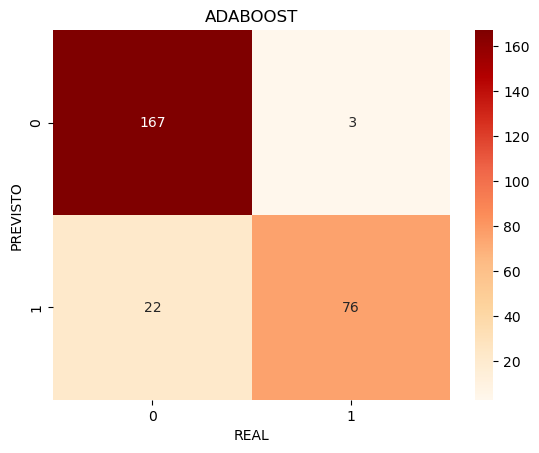

In [672]:
sns.heatmap(confusion_matrix(y_test, ada_pred), cmap='OrRd', annot=True, fmt='2.0f')
plt.title('ADABOOST')
plt.ylabel('PREVISTO')
plt.xlabel('REAL')
plt.show()

### Interpretando a Matriz de Confusão
A diagonal da esquerda mostra o total de predições corretas, a da direita mostra o total de predições erradas.

* O número de predições corretas para AdaBoost é de **167(para mortos) + 76(sobreviventes)**.<br><br>

* **Erros**  
    * Classificou erradamente **3 como mortos (falso negativo)** 
    * E **22 como vivos (falso positivo)**

<a name="precision"></a>

$$Precisão = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Positivos}} $$

<a name="accuracy"></a>

$$Revocação = {\frac {Verdadeiros Positivos}{Verdadeiros Positivos + Falsos Negativos}} $$

<a name="accuracy"></a>

$$Acuracidade = {\frac {Verdadeiros Positivos+Verdadeiros Negativos}{Total}} $$

<a name="accuracy"></a>

$$F1-Score = 2 x{\frac {Precisão \cdot Revocação}{Precisão + Revocação}} $$

### Importando métricas do Sklearn

In [677]:
from sklearn.metrics import (recall_score, accuracy_score, precision_score, f1_score)

### Revocação

In [680]:
recall_score(y_test,ada_pred)

0.7755102040816326

### Acuracidade

In [683]:
accuracy_score(y_test,ada_pred)

0.9067164179104478

### Precisão

In [686]:
precision_score(y_test,ada_pred)

0.9620253164556962

### F1-Score

In [689]:
f1_score(y_test,ada_pred)

0.8587570621468926

<a name="rocauc"></a>

# Curvas ROC e AUC 

O formato da curva contem várias informações, dentre elas, a taxa esperada de falsos positivos e taxa esperada de falsos negativos. 
* O quanto menor for o eixo x menor a quantidade de falsos positivos e maior verdadeiros negativos. 
* Quanto maiores os valores no eixo y, maior a quantidade de verdadeiros positivos e menor a quantidade de falsos negativos.

<br>

[início](#topo)

In [694]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

Sem habilidade: ROC AUC=0.500
AdaBoost: ROC AUC=0.934


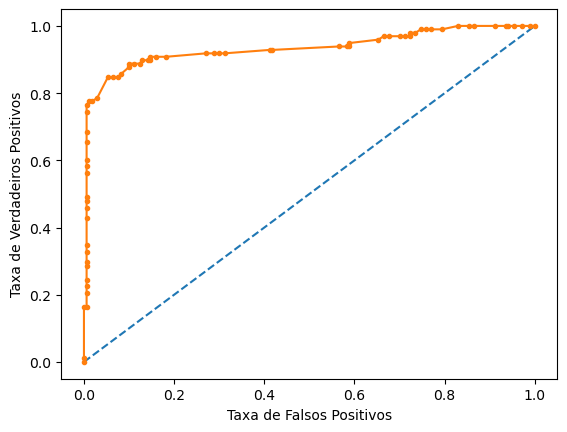

In [762]:
ns_probs = [0 for _ in range(len(y_test))] #no skill

ada_probs = ada.predict_proba(X_test)

ada_probs = ada_probs[:,1]

ns_auc = roc_auc_score(y_test, ns_probs)

ada_auc =roc_auc_score(y_test, ada_probs)

print('Sem habilidade: ROC AUC=%.3f' %(ns_auc))
print('AdaBoost: ROC AUC=%.3f' %(ada_auc))

#calcular a curva ROC
ns_tfp, ns_tvp, _ = roc_curve(y_test,ns_probs) #tfp - taxa falso positivo | tvp - taxa verdadeiro positivo
ada_tfp, ada_tvp, _ = roc_curve(y_test,ada_probs)

plt.plot(ns_tfp,ns_tvp,linestyle='--', label='Sem habilidade')
plt.plot(ada_tfp,ada_tvp, marker='.',label='AdaBoost')

plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')


plt.show()

## Selecionando Threshold (Limite)

In [832]:
pred_proba = ada_probs >= 0.5

In [834]:
pred_proba = pd.Series(pred_proba).map({False:0,True:1}).values

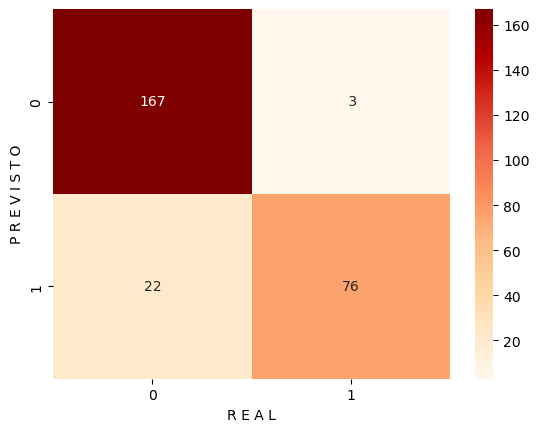

In [836]:
sns.heatmap(confusion_matrix(y_test, pred_proba), cmap='OrRd', annot=True, fmt='2.0f')
plt.ylabel('P R E V I S T O')
plt.xlabel('R E A L')

plt.show()

<a name="hyperparam"></a>

# Customização de Hyper-Parâmetros 

<br>

[início](#topo)

**Parâmetros**

**n_jobs**: Quantidade de núcleos do CPU usados no processo de treino do modelo preditivo. Se for -1, todos os núcleos serão usados.

**n_estimators**: Quantidade de árvores de classificação usadas no modelo preditivo (10 é o padrão)

**max_depth**: Profundidade de árvore ou a quantidade de nós que ela deve se expandir. Se esse valor for muito alto, existe a chance de o modelo super-adequar _(overfit)_ o modelo.

**min_samples_leaf**: O número mínimo de amostras requeridas para ser considerado um ramo. Isso tende a suavizar o modelo.

**verbose**: Controla a saída de textos durante o processo de aprendizagem/treino. O valor 0 não mostra nenhum texto, enquanto 3 mostra o processo de aprendizagem de árvore a cada iteração.

In [838]:
from sklearn.model_selection import GridSearchCV

* ### Random Forest

In [860]:
rf_params = {
    'n_estimators': [100,200],
    'max_depth': [2,4],
    'min_samples_leaf': [1,2,3]
}

gd = GridSearchCV(estimator=RandomForestClassifier(random_state=123),\
                  param_grid=rf_params, verbose=True)

gd.fit(X_train, y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
0.8908903225806452
RandomForestClassifier(max_depth=4, random_state=123)


In [864]:
gd_pred = gd.predict(X_test)

In [866]:
gd_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="ensembling"></a>

# Ensembling
Uma forma de aumentar a acuracidade ou performance do modelo preditivo. Ensembling é a combinação de vários modelos preditivos de forma a ter uma versão final mais poderosa e mais estável. Ensembling pode ser feito de 3 formas:
* Classificão de Votos (Voting Classifier)
* Ensacamento (Bagging)
* Impulsionamento (Boosting)

<br>

[início](#topo)

<a name="voting"></a>

* ### Classificação de Votos

In [870]:
misturados = [('KNN',KNeighborsClassifier(n_neighbors=10)),
                ('RBF',SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                ('RFor',RandomForestClassifier(n_estimators=100,random_state=123)),
                ('LR',LogisticRegression(C=0.05)),
                ('DT',DecisionTreeClassifier(random_state=123)),
                ('NB',GaussianNB()),
                ('svm',SVC(kernel='linear',probability=True))
]

In [875]:
from sklearn.ensemble import VotingClassifier

meu_ensemble = VotingClassifier(estimators=misturados, voting='soft').fit(X_train,y_train)

cross = cross_val_score(meu_ensemble,X_test,y_test, cv=10, scoring='accuracy')

print('Score', meu_ensemble.score(X_test,y_test))
print('Score cross-validado', cross.mean())

Score 0.8880597014925373
Score cross-validado 0.877065527065527


<a name="bagging"></a>

* ### Ensacamento
O Ensacamento aplica classificadores similares em pequenas partições, depois tira a média reduzindo a variância. Diferente da técnica de Classificação de Votos, Ensacamento usa classificadores similares aumentando a estabilidade. 

* #### Ensacamento KNN
Ele é ideal para usar com modelos que possuem muita variância. Pode ser usado com um pequeno valor de n_neighbours, como com um pequeno valor de n_estimators.

In [877]:
from sklearn.ensemble import BaggingClassifier

In [886]:
knn = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),
                       random_state=123, n_estimators=100)

knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
cross = cross_val_score(knn,X_test,y_test, cv=10, scoring='accuracy')

print('Score', knn.score(X_test,y_test))
print('Score cross-validado', cross.mean())

Score 0.7313432835820896
Score cross-validado 0.7237891737891738


* #### Ensacamento DecisionTree


In [901]:
dtree = BaggingClassifier(estimator=DecisionTreeClassifier(),
                       random_state=123, n_estimators=100)

dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)
cross = cross_val_score(dtree,X_test,y_test, cv=10, scoring='accuracy')

print('Score', dtree.score(X_test,y_test))
print('Score cross-validado', cross.mean())

Score 0.8955223880597015
Score cross-validado 0.8773504273504275


<a name="boosting"></a>

* ### Impulsionamento
Impulsionamento é uma técnica ensembling que usa aprendizado sequenciado de classificadores. É um melhoramento gradual de um modelo fraco. O modelo é treinado no dataframe completo, de forma a focar nos erros, tentando melhorá-los iterativamente de forma contínua. 

* #### Exemplos (Impulsionamento Adaptativo): 
    * AdaBoost  
    * GradientBoostingClassifier 
<br>

[início](#topo)

* ### GradientBoostingClassifier

In [905]:
grad = GradientBoostingClassifier(n_estimators=100, random_state=123, learning_rate=0.1)

grad.fit(X_train,y_train)
grad_pred = grad.predict(X_test)
cross = cross_val_score(grad,X_test,y_test, cv=10, scoring='accuracy')

print('Score', grad.score(X_test,y_test))
print('Score cross-validado', cross.mean())

Score 0.914179104477612
Score cross-validado 0.8773504273504275


* ### Configurando Hyper-Parâmetros para o AdaBoost

In [907]:
n_estimator = [100,200]
learn_rate = [0.05,0.1,0.3]
hyper={'n_estimators': n_estimator,'learning_rate': learn_rate}

gd= GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper, verbose=True)

gd.fit(X_train,y_train)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0.8909032258064518
AdaBoostClassifier(learning_rate=0.05, n_estimators=200)


In [909]:
adaboost_pred = gd.predict(X_test)
adaboost_pred

array([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0.

<a name="combinado"></a>

<a name="fimportance"></a>

# Importância de Recursos _(Feature Importance)_ 

<br>

[início](#topo)

In [951]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
    'max_depth': 2,
    'min_samples_leaf': 2,
    'verbose': 0
}

In [953]:
rf = ModeloAuxiliar(clf=RandomForestClassifier, seed=123, params=rf_params)

In [955]:
rf_features = rf.feature_importances(X_train,y_train)

In [957]:
rf_features

array([6.01764262e-03, 4.05970785e-03, 4.66546801e-02, 1.46332264e-01,
       2.96053261e-01, 2.60419579e-03, 3.44175640e-02, 1.87152052e-03,
       7.17398866e-05, 1.61897897e-01, 1.63909705e-03, 2.09768937e-04,
       4.65373458e-02, 3.77747714e-02, 5.53393788e-02, 1.36228968e-01,
       5.30119861e-03, 1.17641023e-02, 5.22489519e-03])

In [959]:
cols = X_train.columns.values

In [961]:
feature_dataframe = pd.DataFrame({'recursos':cols,'Importância de Recursos RForest': rf_features})

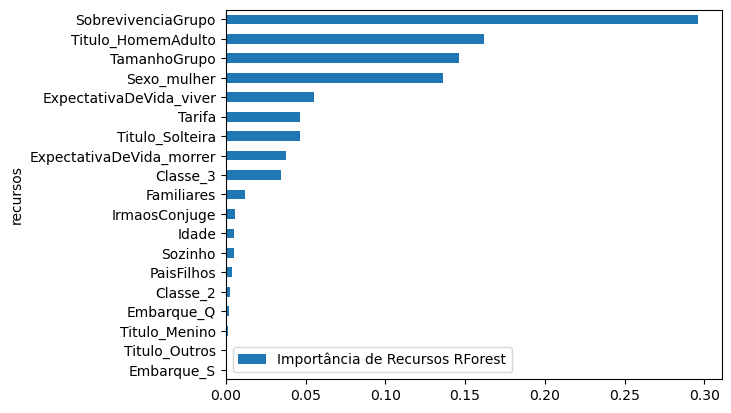

In [963]:
feature_dataframe.sort_values(by='Importância de Recursos RForest').plot.barh(x='recursos')
plt.show()

In [965]:
meu_ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('RBF', SVC(C=0.5, gamma=0.1, probability=True)),
                             ('RFor', RandomForestClassifier(random_state=123)),
                             ('LR', LogisticRegression(C=0.05)),
                             ('DT', DecisionTreeClassifier(random_state=123)),
                             ('NB', GaussianNB()),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [969]:
meu_ensemble.score(X_test,y_test)

0.8917910447761194

In [973]:
ensemble_pred = meu_ensemble.predict(test[recursos])

In [975]:
ensemble_pred

array([0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1.

In [977]:
test.index

Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
       ...
       1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
      dtype='int64', name='PassengerId', length=418)

<a name="submissao"></a>

# Submissão

<br>

[início](#topo)

In [989]:
submissao = pd.DataFrame({
        'PassengerID': test.index,
        'Survived': ensemble_pred
})

In [991]:
submissao['Survived'] = submissao['Survived'].astype('int')

In [993]:
submissao.to_csv('meu_ensemble.csv', index=False)